In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from PIL import Image
import urllib.request


In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head(20)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   
17    -122.27     37.85                52.0       1228.0           293.0   
18    -122.26     37.84                50.0       2239.0           455.0   
19    -122.27     37.84                52.0       1503.0           298.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0         8.3252            452600.0        NEAR BAY  
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2        496.0       177.0         7.2574            352100.0        NEAR BAY  
3        558.0       219.0         5.6431            341300.0        NEAR BAY  
4        565.0       259.0         3.8462            342200.0        NEAR BAY  
5        413.0       193.0         4.0368            269700.0        NEAR BAY  
6       1094.0       514.0         3.6591            299200.0        NEAR BAY  
7       1157.0       647.0         3.1200            241400.0        NEAR BAY  
8       1206.0       595.0         2.0804            226700.0        NEAR BAY  
9       1551.0       714.0         3.6912            261100.0        NEAR BAY  
10       910.0       402.0         3.2031            281500.0        NEAR BAY  
11      1504.0       734.0         3.2705            241800.0        NEAR BAY  
12      1098.0       468.0         3.0750            213500.0        NEAR BAY  
13       345.0       174.0         2.6736            191300.0        NEAR BAY  
14      1212.0       620.0         1.9167            159200.0        NEAR BAY  
15       697.0       264.0         2.1250            140000.0        NEAR BAY  
16       793.0       331.0         2.7750            152500.0        NEAR BAY  
17       648.0       303.0         2.1202            155500.0        NEAR BAY  
18       990.0       419.0         1.9911            158700.0        NEAR BAY  
19       690.0       275.0         2.6033            162900.0        NEAR BAY

# Dataset Description
The dataset contains housing-related information for various locations.

- **longitude**: Longitude coordinate of the location.
- **latitude**: Latitude coordinate of the location.
- **housing_median_age**: Median age of the housing in the location.
- **total_rooms**: Total number of rooms in the housing.
- **total_bedrooms**: Total number of bedrooms in the housing.
- **population**: Total population in the housing area.
- **households**: Total number of households in the housing.
- **median_income**: Median income of households in the housing area.
- **median_house_value**: Median value of houses in the housing area.
- **ocean_proximity**: Proximity of the housing area to the ocean.


In [4]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Overall Summary Statistics

The dataset provides housing-related information for various locations. Here's a brief overview of the key statistics:

- **Count**: There are 20,640 entries in the database. All fields except "total_bedrooms" (which has 20,433 entries) have this number. The median income is $3.87 and the median home value is $206,855.82.
- **Min**: Minimum value from 1.0 to 14,999.0.
- **Median**: Median ranges from $29.0 to $3,534.80.
- **MAXIMUM**: The maximum amount is between $3 and $500,001.0.

In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing.dropna(inplace=True)

In [7]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


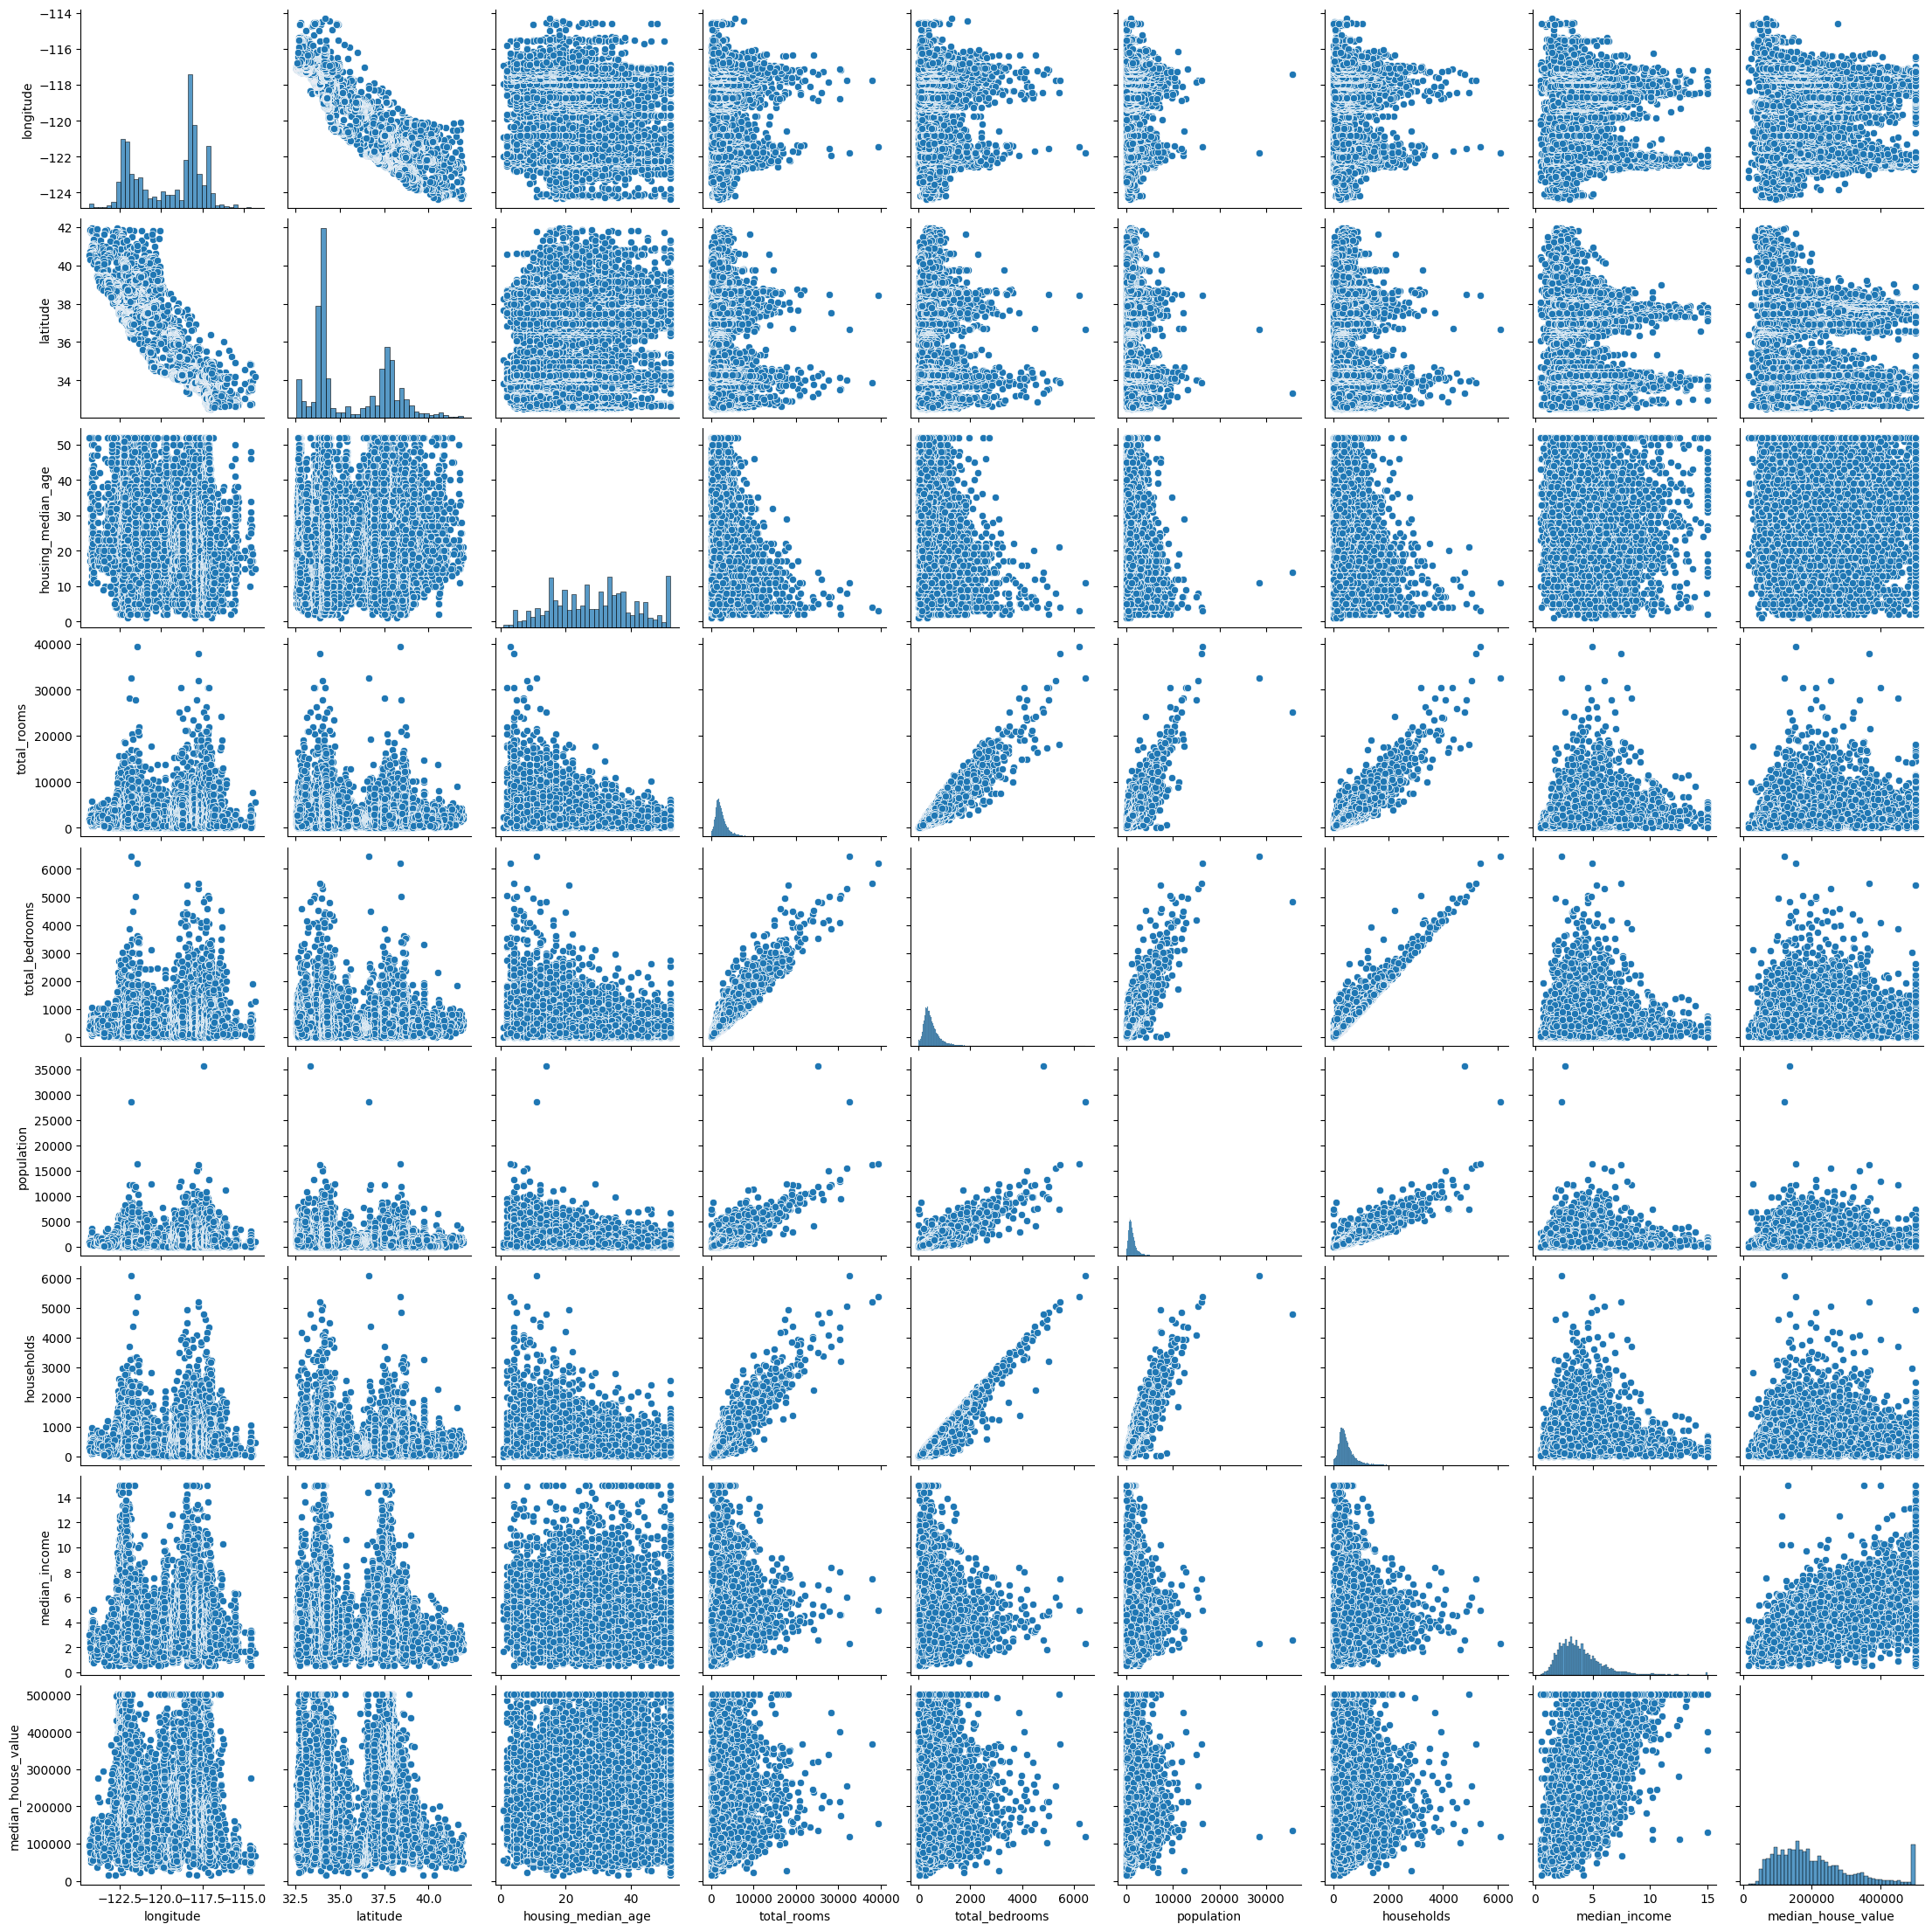

In [9]:
sns.pairplot(housing)
plt.show()

# **PAIR PLOT**

- To better understand the relationships between different factors that affect housing prices, we created a pair plot.
Each subplot here shows how two features are related to each other.

- For instance, we understand there might be a positive correlation between 'median_income' and 'median_house_value'. -This means that in areas with higher median income, there might also be higher median house values.

## **Analysis Summary**

- Many features exhibit non-linear relationships with the target variable.
- There is a noticeable correlation between "total_bedrooms" and "households," suggesting possible duplication of information.
- "Total_rooms," "total_bedrooms," and "population" are closely related and demonstrate correlation with each other.
- "Median_income" shows a clear linear relationship with the target variable.
- "Latitude" and "longitude" do not show linear relationships with the target, but the majority of data points cluster around two specific locations, indicating potentially highly populated areas.
- Suspected outliers are observed:
  - "Housing_median_age" ranges from 0 to 52, with a significant concentration at 52 (>1000 records).
  - "Population" feature indicates an outlier that affects the plot.
  - "Total_rooms" and "median_income" have a slight possibility of outlier data points.


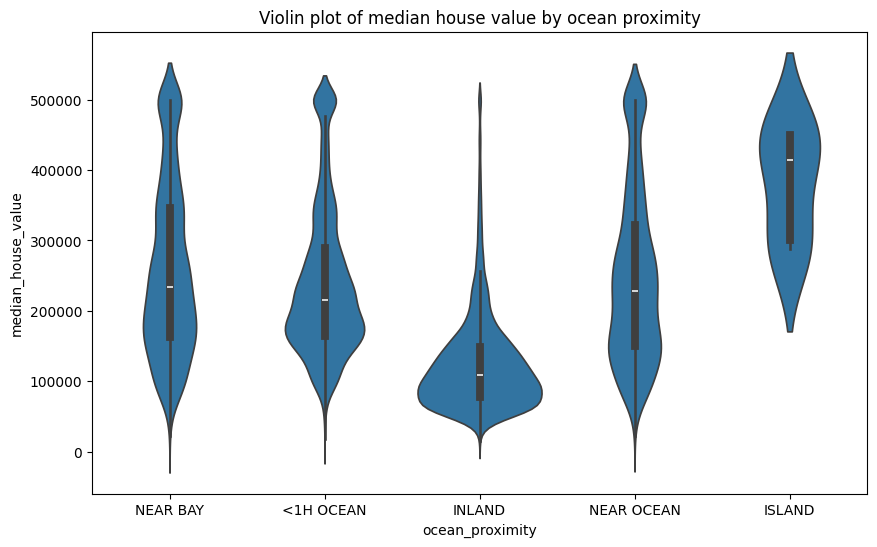

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing)
plt.title('Violin plot of median house value by ocean proximity')
plt.show()

## **Violin Plot Analysis**
- The plot suggests that properties closer to the ocean, such as those in the "ISLAND" and "NEAR OCEAN" categories, tend to have higher median house values compared to those further inland.


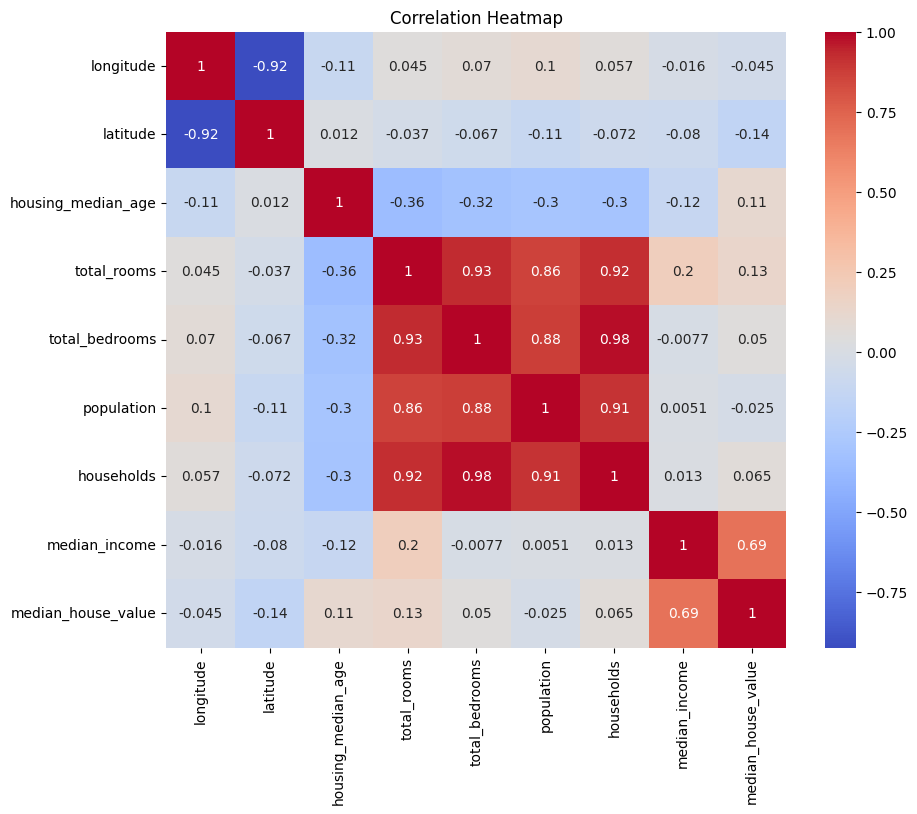

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **HeatMap Analysis**

- This heatmap is a useful tool to visualize the relationships between the numerical features in our California housing dataset.

- Each square shows the correlation coefficient between two features, colored according to a 'coolwarm' colormap
Colors indicate how closely features are related. Red means they tend to go up together, blue means they tend to go in opposite directions, and white means there's no clear connection.

- For example, one red square shows a strong link between 'median income' and 'median house value'. This makes sense because houses in wealthier areas are likely to be more expensive.

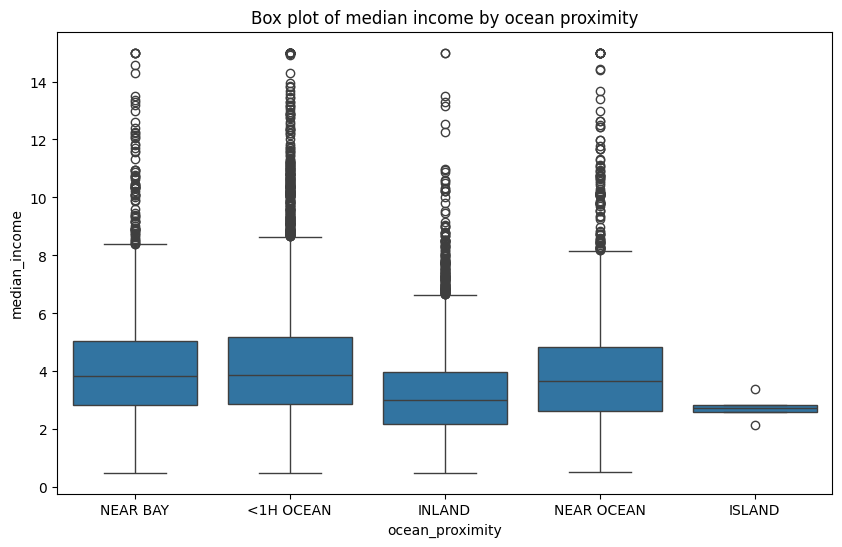

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=housing)
plt.title('Box plot of median income by ocean proximity')
plt.show()

## **Box Plot Analysis**

- This box plot shows us how median income varies across different locations relative to the ocean.

- The boxes reveal a wider spread of incomes for houses closer to the ocean, whereas inland areas tend to have a tighter range of incomes.

- Interestingly, the center lines within the boxes also suggest that median income tends to be higher for locations closer to the ocean.

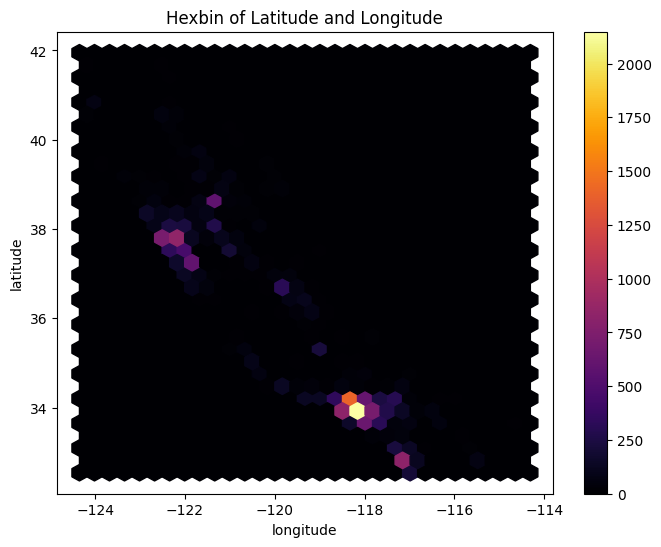

In [13]:
housing.plot(kind='hexbin', x='longitude', y='latitude', gridsize=30, figsize=(8, 6), cmap='inferno')
plt.title('Hexbin of Latitude and Longitude')
plt.show()

## **Hexbin Plot Analysis**

- This visualization shows the geographic distribution of houses in our California housing dataset.

- The color intensity indicates the concentration of houses in different areas. Darker colored regions represent areas with a higher density of houses, while lighter colored areas represent areas with fewer houses.

- We can see that houses are not spread uniformly across California, but rather there are clusters of houses in certain areas.

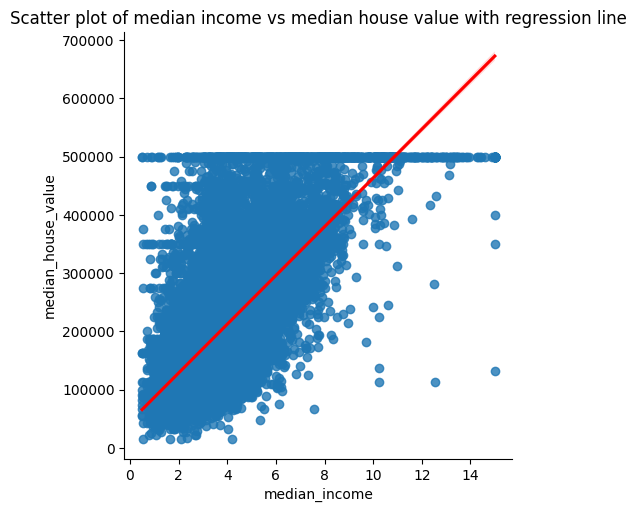

In [14]:
sns.lmplot(x='median_income', y='median_house_value', data=housing, line_kws={'color': 'red'})
plt.title('Scatter plot of median income vs median house value with regression line')
plt.show()

## **Scatter Plot Analysis**

- This scatter plot shows the relationship between median income and median house value in California.

- The red line represents the fitted regression line, which suggests a general upward trend. This means that as median income increases, median house value also tends to increase.

- However, it's important to note that there is some scatter around the line, indicating that there are other factors besides median income that can influence house prices.

In [15]:
housing = housing[housing['median_house_value'] < 500000]

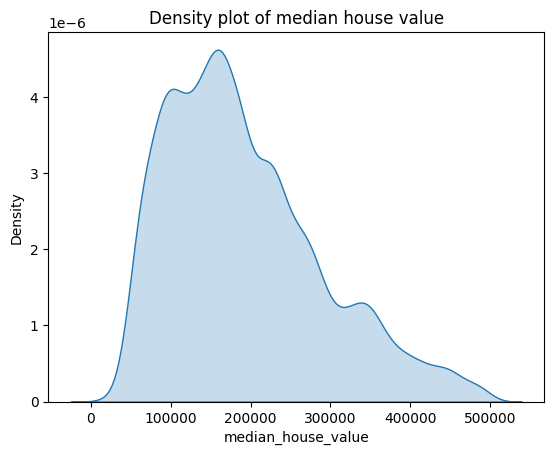

In [17]:
sns.kdeplot(housing['median_house_value'], fill=True)
plt.title('Density plot of median house value')
plt.show()

## **Analysis of Density Plot**

- After filtering our data to focus on houses priced below $500,000, we can see the distribution of median house values in this price range using this density plot.

- The shape of the curve suggests that a larger portion of houses fall into the lower and middle price ranges, with the density tapering off towards more expensive houses.

- This aligns with our filtering criteria and reflects the distribution of median house values within this specific price range.

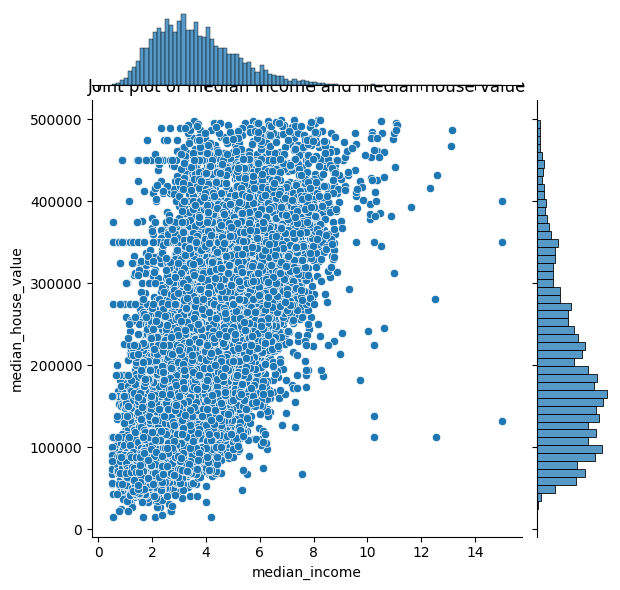

In [18]:
sns.jointplot(x='median_income', y='median_house_value', data=housing, kind='scatter')
plt.title('Joint plot of median income and median house value')
plt.show()

## **Analysis of Joint Plot**

- This joint plot shows the relationship between median income and median house value in California.

- We can see that there's a general upward trend, where houses in areas with higher median income tend to also have higher median house values.

- However, it's important to note that there's also significant scatter in the data points.
This indicates that other factors besides median income can influence house prices.

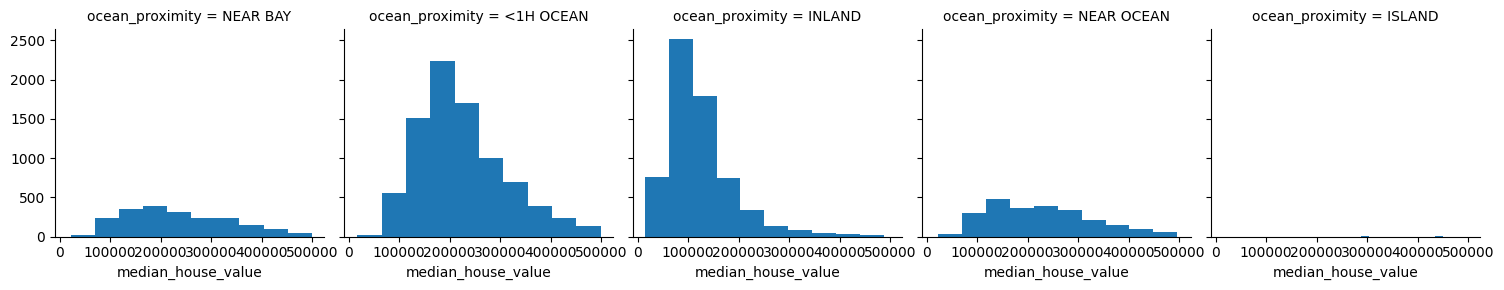

In [19]:
g = sns.FacetGrid(housing, col='ocean_proximity')
g.map(plt.hist, 'median_house_value')
plt.show()

## **Analysis of Facet Grid**

- This facet grid helps us see how the distribution of median house value varies across different locations relative to the ocean.

- Each column represents an ocean proximity category.
Here, we can see that the distribution of median house value in the 'NEAR BAY' category appears to be different from the distribution in the 'OCEAN' category.

- This suggests that there might be a relationship between ocean proximity and the spread of house prices in California.

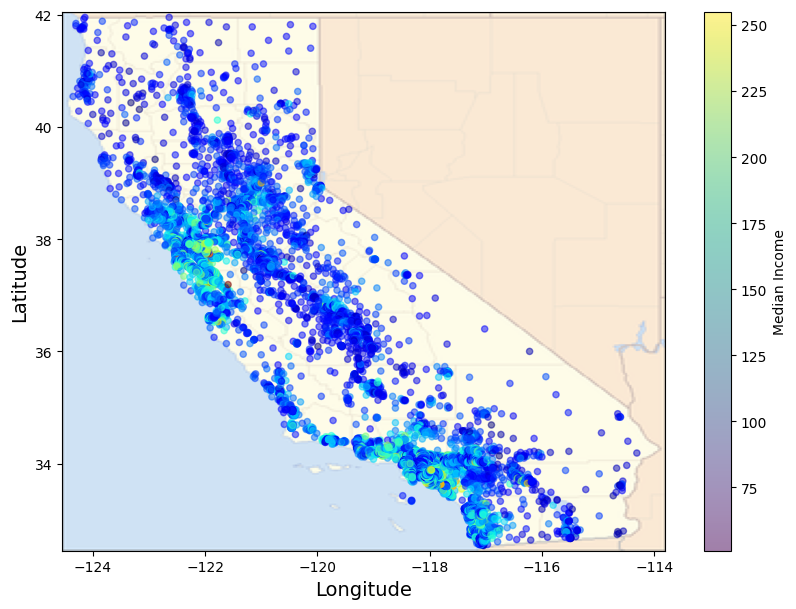

In [22]:
with urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG') as url:
    california_img = np.array(Image.open(url))

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       c="median_income", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.5)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
cbar = plt.colorbar()
cbar.set_label('Median Income')

plt.show()

## **Analysis of Scatter Plot overlaid on a map of California**

- We can see here the geographic distribution of houses in our California housing dataset, overlaid on a map.

- The color of each house represents its median income.
This allows us to see clusters of houses with similar income levels throughout the state.

- For instance, we can see areas with a higher concentration of houses in colors representing higher median income in the San Francisco Bay Area, which is a hub for technology companies and has a high cost of living..

In [25]:
le = LabelEncoder()
housing.loc[:, 'ocean_proximity'] = le.fit_transform(housing['ocean_proximity'])
X_train, X_test, y_train, y_test = train_test_split(housing.drop('median_house_value', axis=1), housing['median_house_value'], test_size=0.2, random_state=42)

## **Random Forest**

In [26]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_rf}')

Root Mean Squared Error: 44828.22602725059


## **Linear Regression**

In [28]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_lr}')

Root Mean Squared Error: 61395.80913042277


## **Support Vector Regression**

In [27]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_svr}')

Root Mean Squared Error: 83400.4028318409


## **Decision Tree**

In [29]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_dt = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_dt}')

Root Mean Squared Error: 61129.18565899287


In [30]:
rmse_values = {
    'Random Forest': rmse_rf,
    'Linear Regression': rmse_lr,
    'Support Vector Regression': rmse_svr,
    'Decision Tree': rmse_dt
}

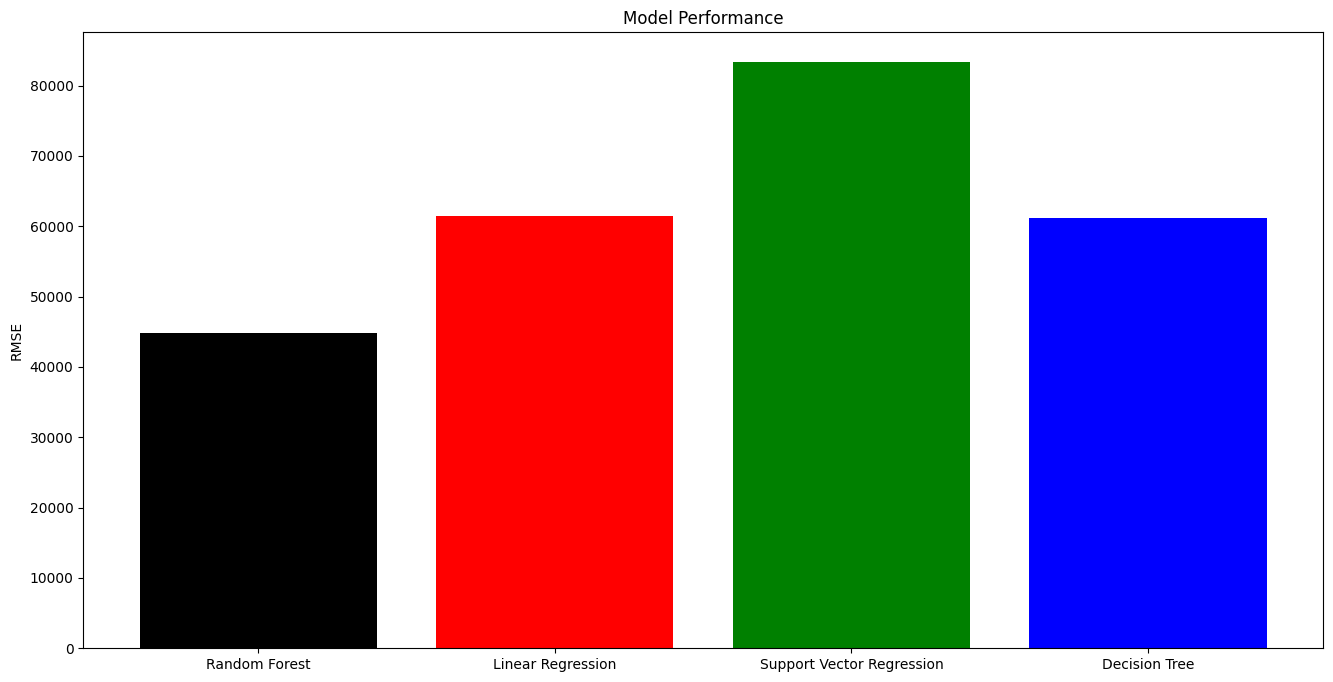

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel('RMSE')
plt.title('Model Performance')
plt.show()

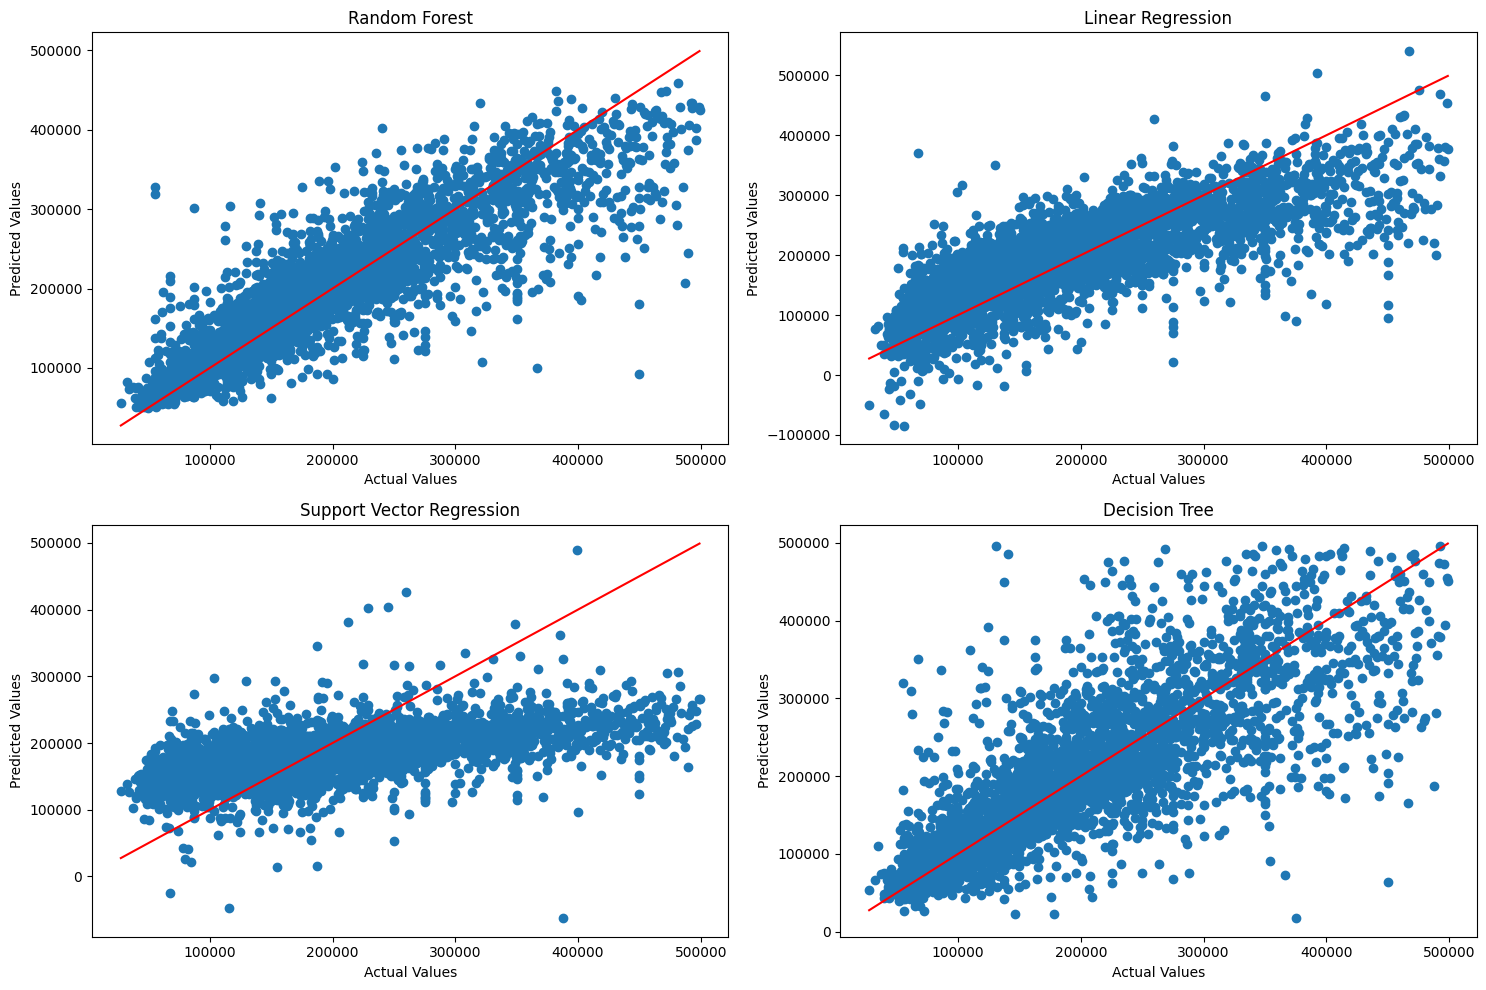

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].scatter(y_test, y_pred_rf)
ax[0, 0].set_xlabel('Actual Values')
ax[0, 0].set_ylabel('Predicted Values')
ax[0, 0].set_title('Random Forest')

ax[0, 1].scatter(y_test, y_pred_lr)
ax[0, 1].set_xlabel('Actual Values')
ax[0, 1].set_ylabel('Predicted Values')
ax[0, 1].set_title('Linear Regression')

ax[1, 0].scatter(y_test, y_pred_svr)
ax[1, 0].set_xlabel('Actual Values')
ax[1, 0].set_ylabel('Predicted Values')
ax[1, 0].set_title('Support Vector Regression')

ax[1, 1].scatter(y_test, y_pred_dt)
ax[1, 1].set_xlabel('Actual Values')
ax[1, 1].set_ylabel('Predicted Values')
ax[1, 1].set_title('Decision Tree')

line = np.linspace(min(y_test), max(y_test), 1000)
for subplot in ax.flat:
    subplot.plot(line, line, color='red')

plt.tight_layout()
plt.show()

## **Why we did not use Logistic Regression?**

Logistic regression is a binary classification algorithm, commonly used when the dependent variable is binary. However, the Data provided contains data for predicting housing prices (median_house_value), which is a continuous variable, not a binary one.

Still we can implement the Logistic Regresison by Feature Engineering and implementing Logistic Regression to predict values which higher and lower at a threshhold point. But this will result in poor performance of the model.

## **RESULTS**

The Random Forest model has the lowest RMSE (44828.2260), making it the best-performing model.

Random Forest is a powerful ensemble learning method that builds multiple decision trees and merges their predictions to improve accuracy and reduce overfitting.

## **How can other models be improved in future?**

**Feature Engineering:** Analyze and preprocessing features to extract more meaningful information. This could involve creating new features, scaling features, handling missing values, or transforming variables.

**Hyperparameter Tuning:** Adjust the hyperparameters of the models to find better combinations that improve performance.

**Ensemble Methods:** Implement ensemble techniques such as bagging, boosting, or stacking to combine multiple models for improved performance.

**Cross-Validation:** Ensure robust evaluation of models by using cross-validation techniques to estimate performance on unseen data more accurately. This helps in identifying overfitting and ensures that model generalizes well to new data.

**Feature Selection:** Identify and select the most relevant features for prediction, which can help in reducing model complexity and overfitting. Techniques like feature importance from Random Forest or Lasso regularization in linear regression can aid in feature selection.